In [22]:
import scipy.optimize as spo
import numpy as np
from ex_net_load_data import get_ex_net_load_data

In [25]:
charge_discharge_efficiency = 0.95
battery_capacity = 3
max_charge_rate = 0.5
max_discharge_rate = -0.5
self_discharge = 0.03
max_soc = 0.9
min_soc = 0.1
initial_soc = 1.5

#net_load = np.array([1, 1.1, 1.3, 1.5, 1.8, 2, 2.1, 2.3, 2.5, 3, 3.1, 2.7, 2.2, -1, -3, -3, -3, -3, -1.9, -2, -2.1, -1, 0, 1, 2, 3, 3.3, 4, 3.5, 3.3, 2.9, 2.3, 1.8, 1.4, 1.2, 1.1])
net_load = get_ex_net_load_data()
pred_points = len(net_load)
x0 = np.ones(pred_points)

In [30]:
# Define the objective function

def import_energy(input_charge):
    import_energy = np.zeros(pred_points)

    for t in range(pred_points):
        import_energy[t] = max(0, net_load[t] + input_charge[t])
e
    return np.sum(import_energy)


# Define the Soc Constraint
def soc_constraint(input_charge):
    soc = np.zeros(pred_points + 1)
    soc[0] = initial_soc

    for t in range(pred_points):
        soc[t + 1] = soc[t] + input_charge[t] * charge_discharge_efficiency - self_discharge * soc[t]

    return battery_capacity * max_soc - soc, soc - min_soc * battery_capacity


# Define battery max charge constraint
def charge_constraint(x):
    return max_charge_rate - x, x - max_discharge_rate


# Perform the optimization
result = spo.minimize(
    import_energy,
    x0,
    method="SLSQP",
    constraints=[
        {"type": "ineq", "fun": lambda x: soc_constraint(x)[0]},
        {"type": "ineq", "fun": lambda x: soc_constraint(x)[1]},
        {"type": "ineq", "fun": lambda x: charge_constraint(x)[0]},
        {"type": "ineq", "fun": lambda x: charge_constraint(x)[1]}
    ]
)

# Print the result
print(result.x)

[-0.5        -0.46548084 -0.20329477  0.00966237  0.00927939  0.00947368
  0.00947368  0.00947368  0.00947368  0.00947368  0.00947368  0.00947368
  0.00947368  0.00947368  0.00947368  0.00947368  0.00947368  0.00947368
  0.00947368  0.00947368  0.00947368  0.00947368  0.00947368  0.00947368
  0.00947368  0.00947368  0.00947368  0.00947368  0.00947368  0.00947368
  0.00947368  0.00947368  0.00947368  0.00947368  0.00947368  0.00947368
  0.00947368  0.00947368  0.00947368  0.00947368  0.00947368  0.00947368
  0.01281411  0.01272478  0.01263263  0.01253771  0.37725065  0.35799025
  0.33813413  0.31766392  0.29656127  0.27480527  0.25237708  0.22925403
  0.20541642  0.18084184  0.15550733  0.129389    0.10246287  0.08157191
  0.08209532  0.08339054  0.0872638   0.09125673  0.09537328  0.0996174
  0.08278241  0.02143946  0.00393639 -0.03089049 -0.4999999  -0.49998788
 -0.49973062 -0.40529119 -0.14128365  0.00995493  0.00878306  0.00947368
  0.00947368  0.00947368  0.00947368  0.00947368  0.

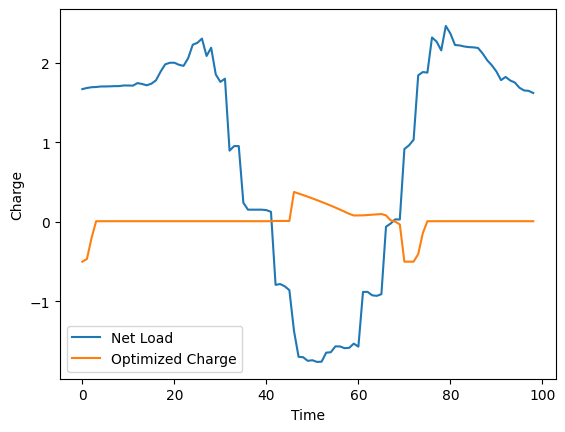

In [27]:
import matplotlib.pyplot as plt

plt.plot(net_load, label='Net Load')
plt.plot(result.x, label='Optimized Charge')
plt.xlabel('Time')
plt.ylabel('Charge')
plt.legend()
plt.show()